In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

simpleclean = pd.read_csv("origin_simpleclean.csv", names=["origin", "cleaned"], header=None)
simpleclean

,origin,cleaned
0,http://017uk.cf/2015/07/,017ukcf201507
1,http://1000.menu/catalog/pasternak,1000menucatalogpasternak
2,http://1007.show758.com/,1007show758com
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,1008643rmsncomldDvQPxAuuXlOKv4UvMDiEi4jVUCUwsO...
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,1019ampradiocbslocalcomtagjohnnygill2
...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,zhwikipediaorgwikiCategoryE882B2E7A9BAE59CB0E7...
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,zhwikipediaorgzhhkE5A19EE588A9E7B1B3E880B6E6B8...
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,zhwikipediaorgzhtwE6ADA3E7BEA9E881AFE79B9F
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,zhwiktionaryorgwikiD181D0BDD0BED188D0B5D0BDD0B...


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

xxhash = pd.read_csv("xxhash3264.csv", names=["origin", "hashed32", "hashed64"], header=None)
xxhash

,origin,hashed32,hashed64
0,http://017uk.cf/2015/07/,471d8c15,21d8e217681a7aae
1,http://1000.menu/catalog/pasternak,901d7a66,68cf43ffdc56edb5
2,http://1007.show758.com/,3316bc33,697b41b39e8ea78a
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,a34d0bb4,bf9623510a660681
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,d6804742,e6d379c72f44da54
...,...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,e46894a5,8ab2eb9b2a6fbe2a
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,97c5f276,be21a0fa928cdea3
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,a6e0c127,fd5594b38e18b8fc
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,9b512089,0c82d9bb08f691d3


In [3]:
xxhash["origin size"] = xxhash.origin.apply(lambda x : len(x))
xxhash["hashed64 xxhash size"] = xxhash.hashed64.apply(lambda x : len(x))
xxhash["hashed32 xxhash size"] = xxhash.hashed32.apply(lambda x : len(x))
xxhash

,origin,hashed32,hashed64,origin size,hashed64 xxhash size,hashed32 xxhash size
0,http://017uk.cf/2015/07/,471d8c15,21d8e217681a7aae,24,16,8
1,http://1000.menu/catalog/pasternak,901d7a66,68cf43ffdc56edb5,34,16,8
2,http://1007.show758.com/,3316bc33,697b41b39e8ea78a,24,16,8
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,a34d0bb4,bf9623510a660681,236,16,8
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,d6804742,e6d379c72f44da54,51,16,8
...,...,...,...,...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,e46894a5,8ab2eb9b2a6fbe2a,75,16,8
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,97c5f276,be21a0fa928cdea3,94,16,8
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,a6e0c127,fd5594b38e18b8fc,67,16,8
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,9b512089,0c82d9bb08f691d3,79,16,8


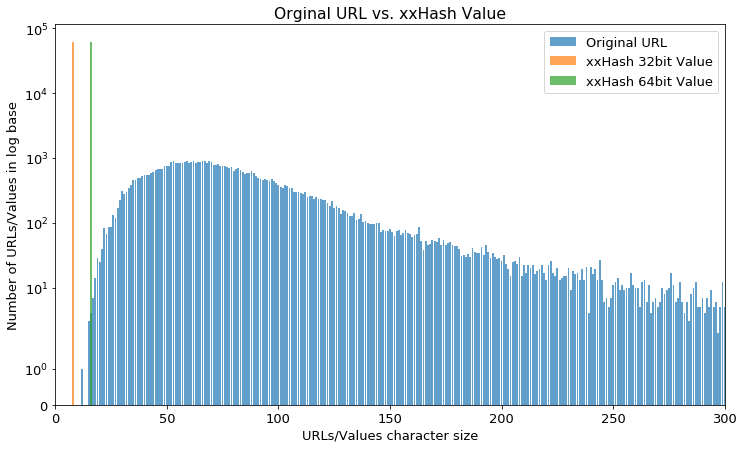

In [17]:
import matplotlib 
import matplotlib.pyplot as plt
font = {'size' : 13}

plt.rc('font', **font)

plt.figure(figsize=(12,7))
plt.xlabel('URLs/Values character size')
plt.title("Orginal URL vs. xxHash Value")
plt.ylabel('Number of URLs/Values in log base')
plt.xlim(right = 300)
# plt.xscale("log")
plt.yscale("symlog")
plt.bar(list(xxhash.groupby("origin size").count().index), list(xxhash.groupby("origin size")["origin"].count()), alpha = 0.7)
plt.bar(list(xxhash.groupby("hashed32 xxhash size").count().index), list(xxhash.groupby("hashed32 xxhash size")["origin"].count()), alpha = 0.7)
plt.bar(list(xxhash.groupby("hashed64 xxhash size").count().index), list(xxhash.groupby("hashed64 xxhash size")["origin"].count()), alpha = 0.7)
plt.legend(('Original URL', 'xxHash 32bit Value', 'xxHash 64bit Value'))
plt.savefig('original_vs_xxhashall.png')